Toxic Comment Classification (P13):

Team Members:
- Isha Jayesh Pandya
- Meenakshi Madugula
- Prashanthi Kanniappan Murthy
- Suraj Siddharudh


This file reads the Training and Testing dataset and preprocess the data. We remove stopwords, non-ascii characters and perform lemmatization, stemming

In [1]:
# -*- coding: utf-8 -*-
import csv
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/trend-
[nltk_data]     setter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/trend-
[nltk_data]     setter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Read the Training and Testing data set
train_data = pd.read_csv("./train.csv", encoding="utf-8")
test_data = pd.read_csv("./test.csv", encoding="utf-8")

In [3]:
# Initialize Stop words, Tokenizer, Lemmatizer, Stemmer
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

(159571, 8)


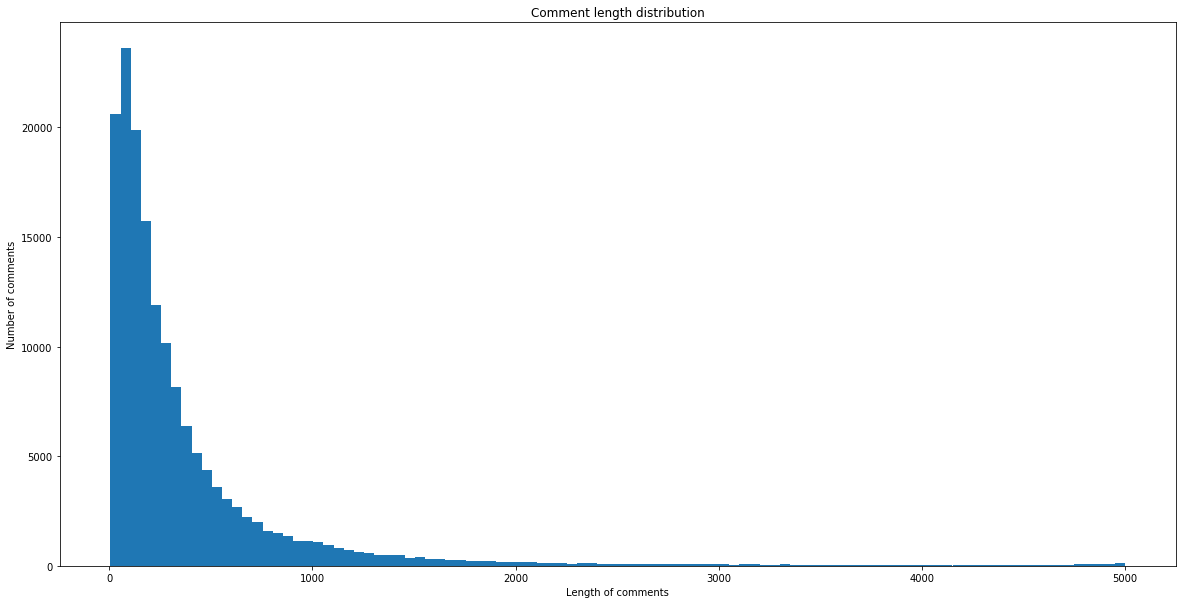

In [4]:
# Plot the graph for comment Length Distribution on the original data set

print(train_data.shape)
itr=[i for i in train_data.iloc[:, 1]]

plt.figure(figsize=(20, 10))
plt.hist([len(com) for com in itr], 100)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.title('Comment length distribution')
plt.savefig("Before_comment_length_dist.png")
plt.show()

In [5]:
# Plot the Frequency Distribution in the data set
def plot_freq_dist(itr, name):
    kwargs = {
        'ngram_range' : (1, 2),
        'strip_accents' : 'unicode',
        'analyzer' : 'word',
        'max_features' : 10000,
        'max_df' : 0.7
     }
    vectorizer = CountVectorizer(**kwargs)
    vect_texts = vectorizer.fit_transform(itr)
    ngrams = vectorizer.get_feature_names()
    num_ngrams = min(50, len(ngrams))
    all_counts = vect_texts.sum(axis=0).tolist()[0]
    all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, ngrams), reverse=True)])
    ngrams = all_ngrams[:num_ngrams]
    counts = all_counts[:num_ngrams]

    index = np.arange(num_ngrams)

    plt.figure(figsize=(40, 40))
    plt.bar(index, counts, width=0.7)
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of words')
    plt.xticks(index, ngrams, rotation=45)
    plt.savefig(name)
    plt.show()

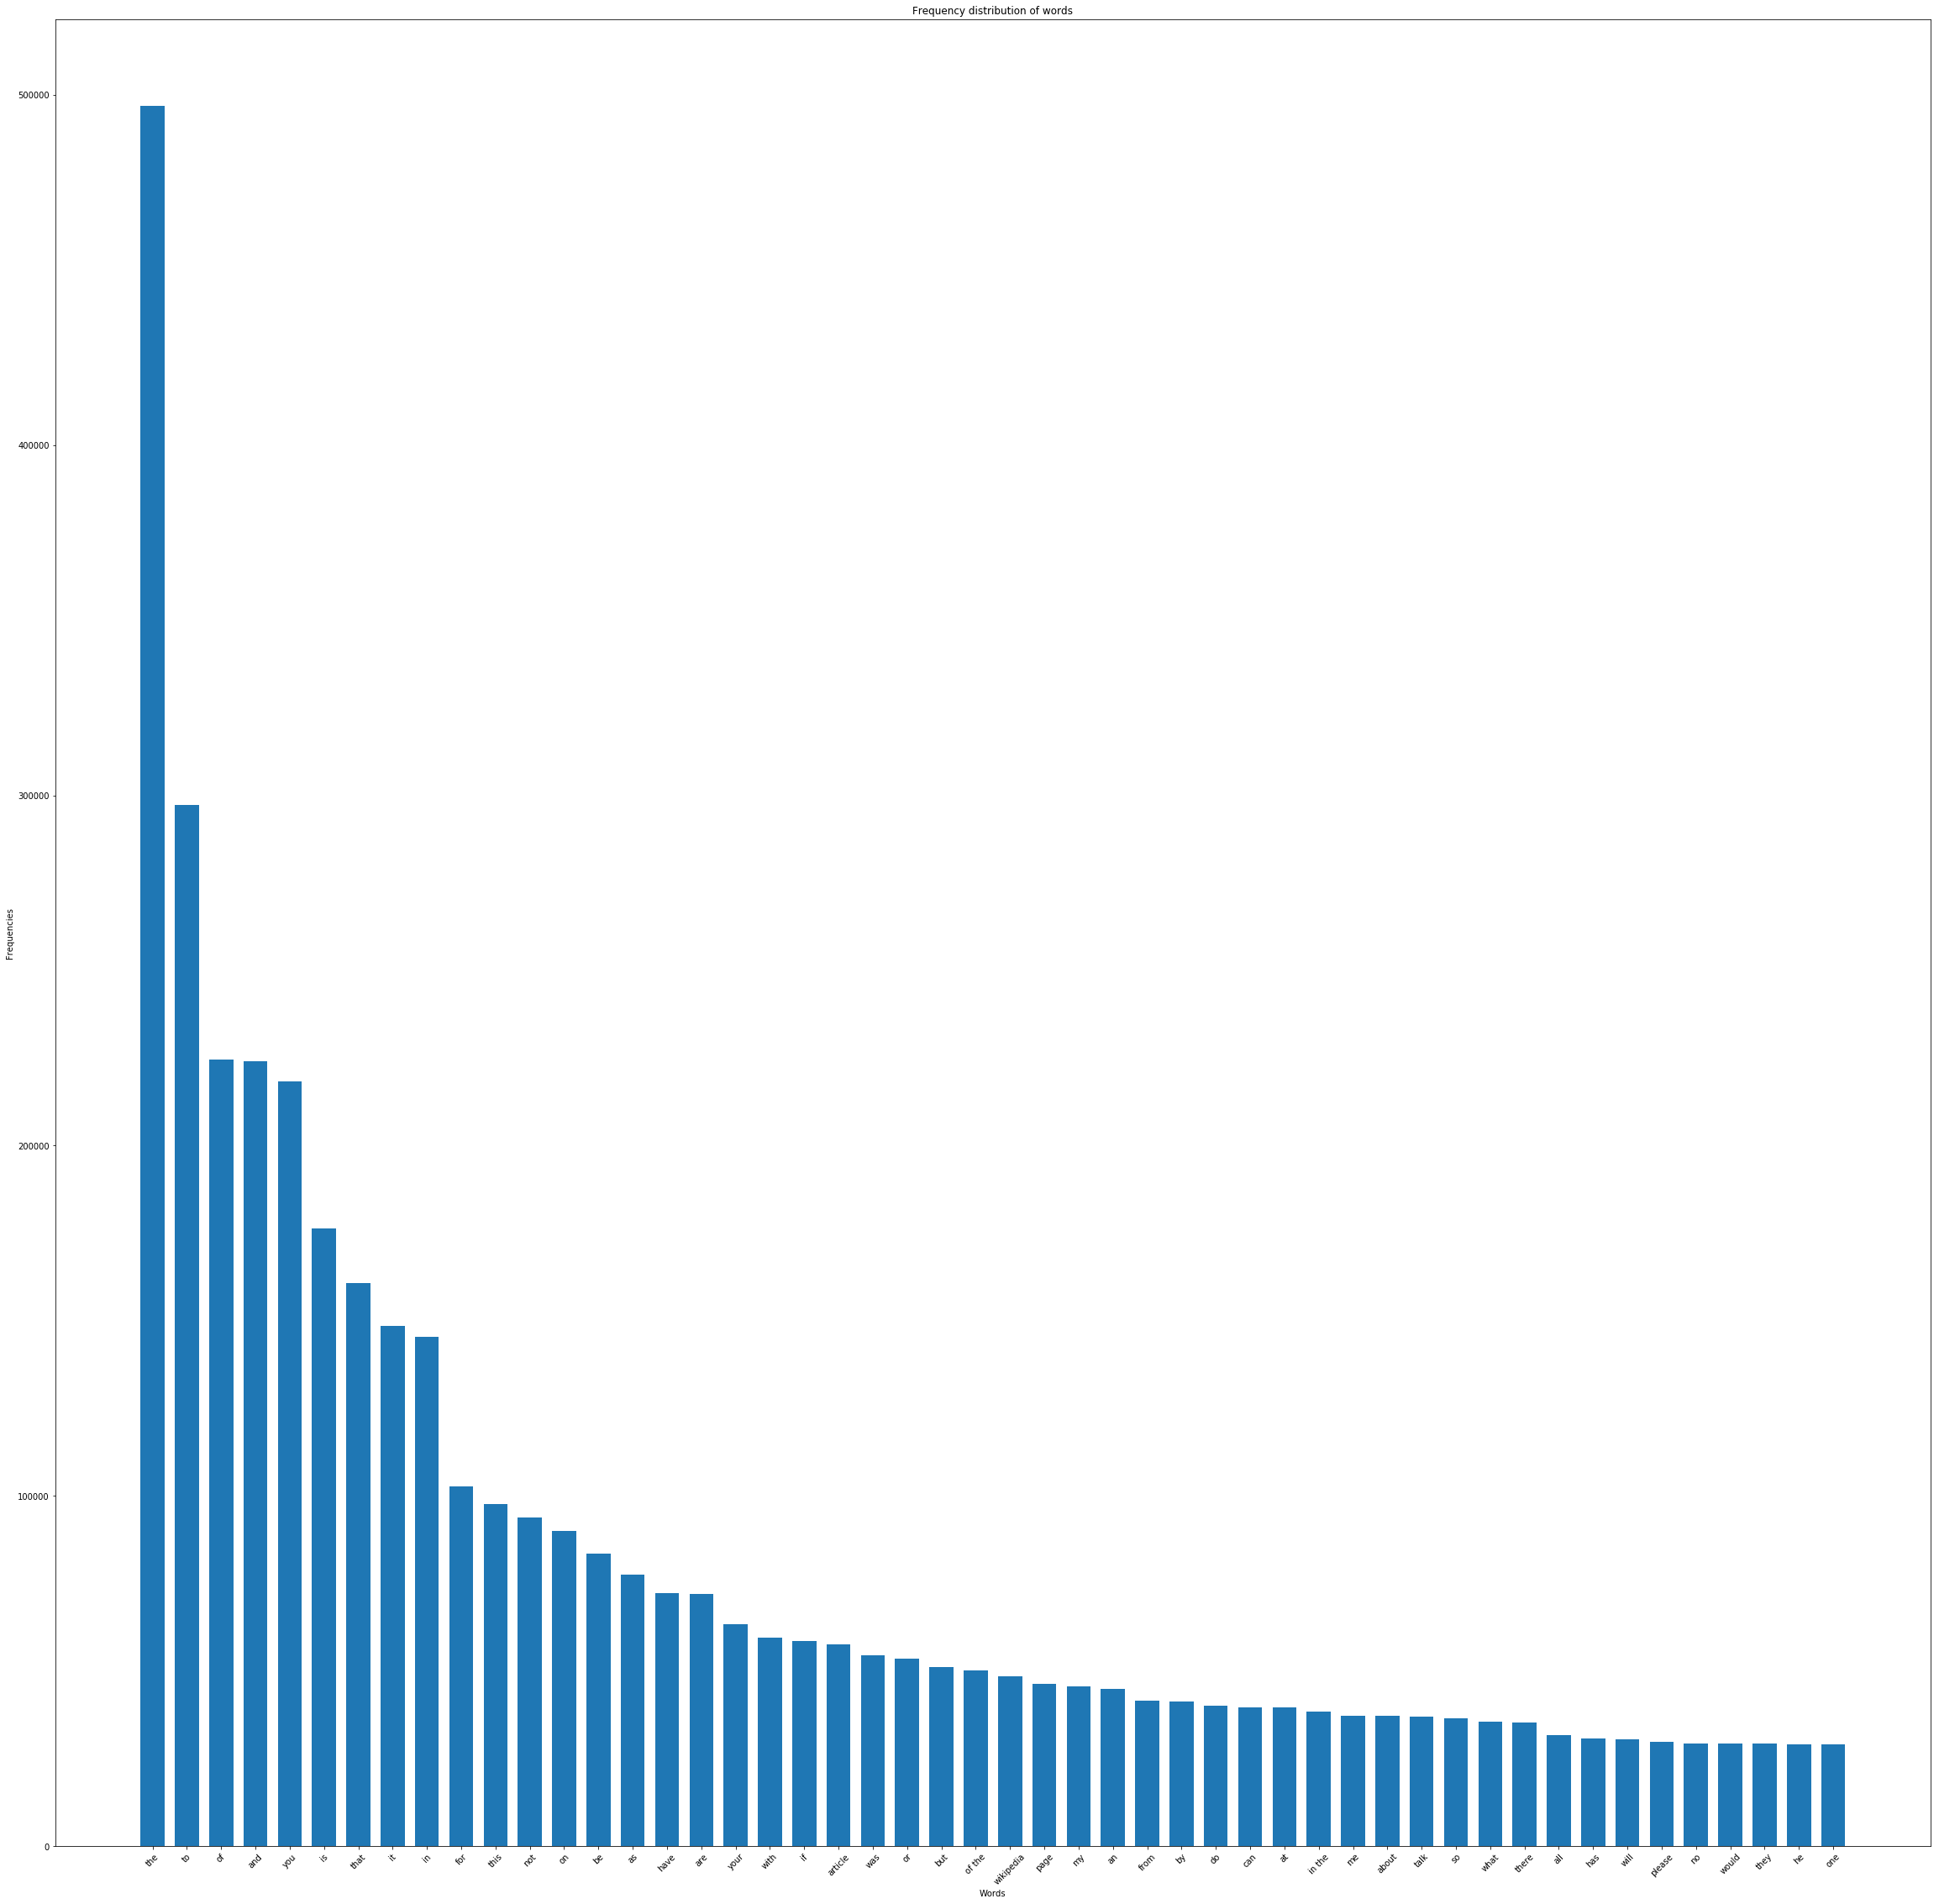

In [6]:
# Plot the Frequency Distribution before preprocessing
plot_freq_dist(itr, "before_preprocess_freq_dist.png")

In [7]:
# Method to preprocess the data
def preprocess(data):
    count=0
    new_data=[]
    for iter in range(len(data)):
        curText=data.iloc[iter,1]
        if len(curText) > 0:
            
            ascii_data = re.sub('[^A-Za-z0-9\']+', ' ', curText)
            word_tokens = tokenizer.tokenize(ascii_data)
            text = [w for w in word_tokens if w.lower() not in stop_words]
            lem_text = [lemmatizer.lemmatize(i) for i in text]
            
            stem_text = ""
            for abc in lem_text:
                stem = "".join([stemmer.stem(i) for i in abc])
                stem_text = stem_text + " " + stem
            new_data.append(stem_text)
        else:
            new_data.append(np.NaN)
            count=count+1
            # Drop the lines if the comment is empty
    data['comment_text']=new_data
    
    return data      

In [8]:
# Drop NA from the training data set
train_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
trained_data = preprocess(train_data)

trained_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(len(trained_data))

trained_data.to_csv("trained_data.csv")

159571


(159571, 8)
After Data Processing...



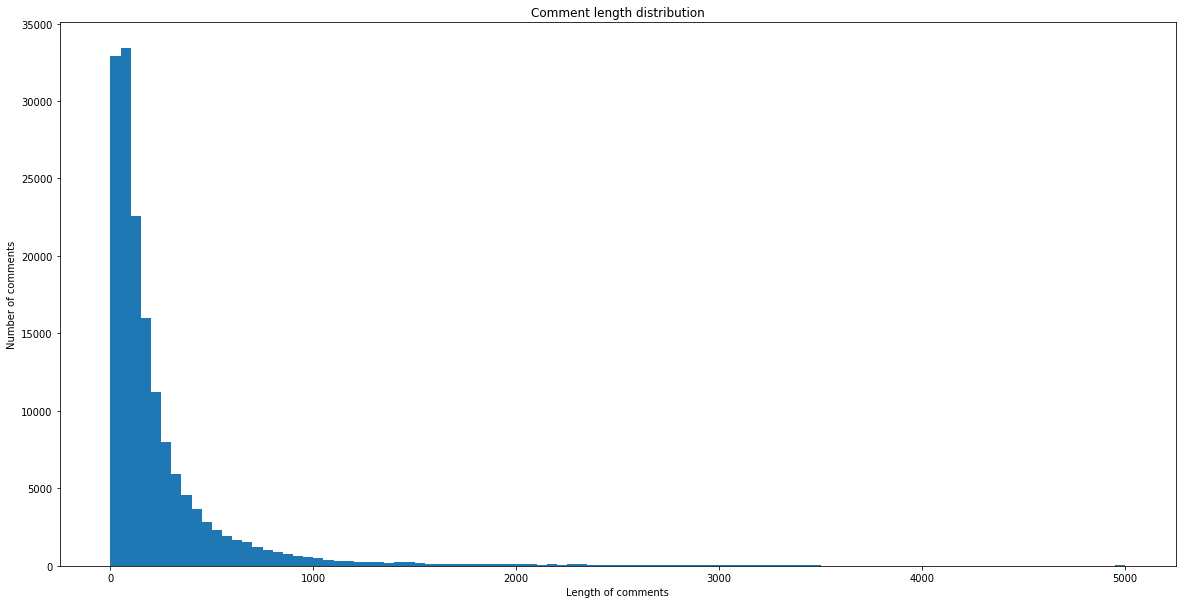

In [9]:
# Plot the graph for comment Length Distribution on the pre processed data set
print(trained_data.shape)
itr=[i for i in trained_data.iloc[:, 1]]

print("After Data Processing...\n")
plt.figure(figsize=(20, 10))
plt.hist([len(com) for com in itr], 100)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.title('Comment length distribution')
plt.savefig("After_comment_length_dist.png")
plt.show()

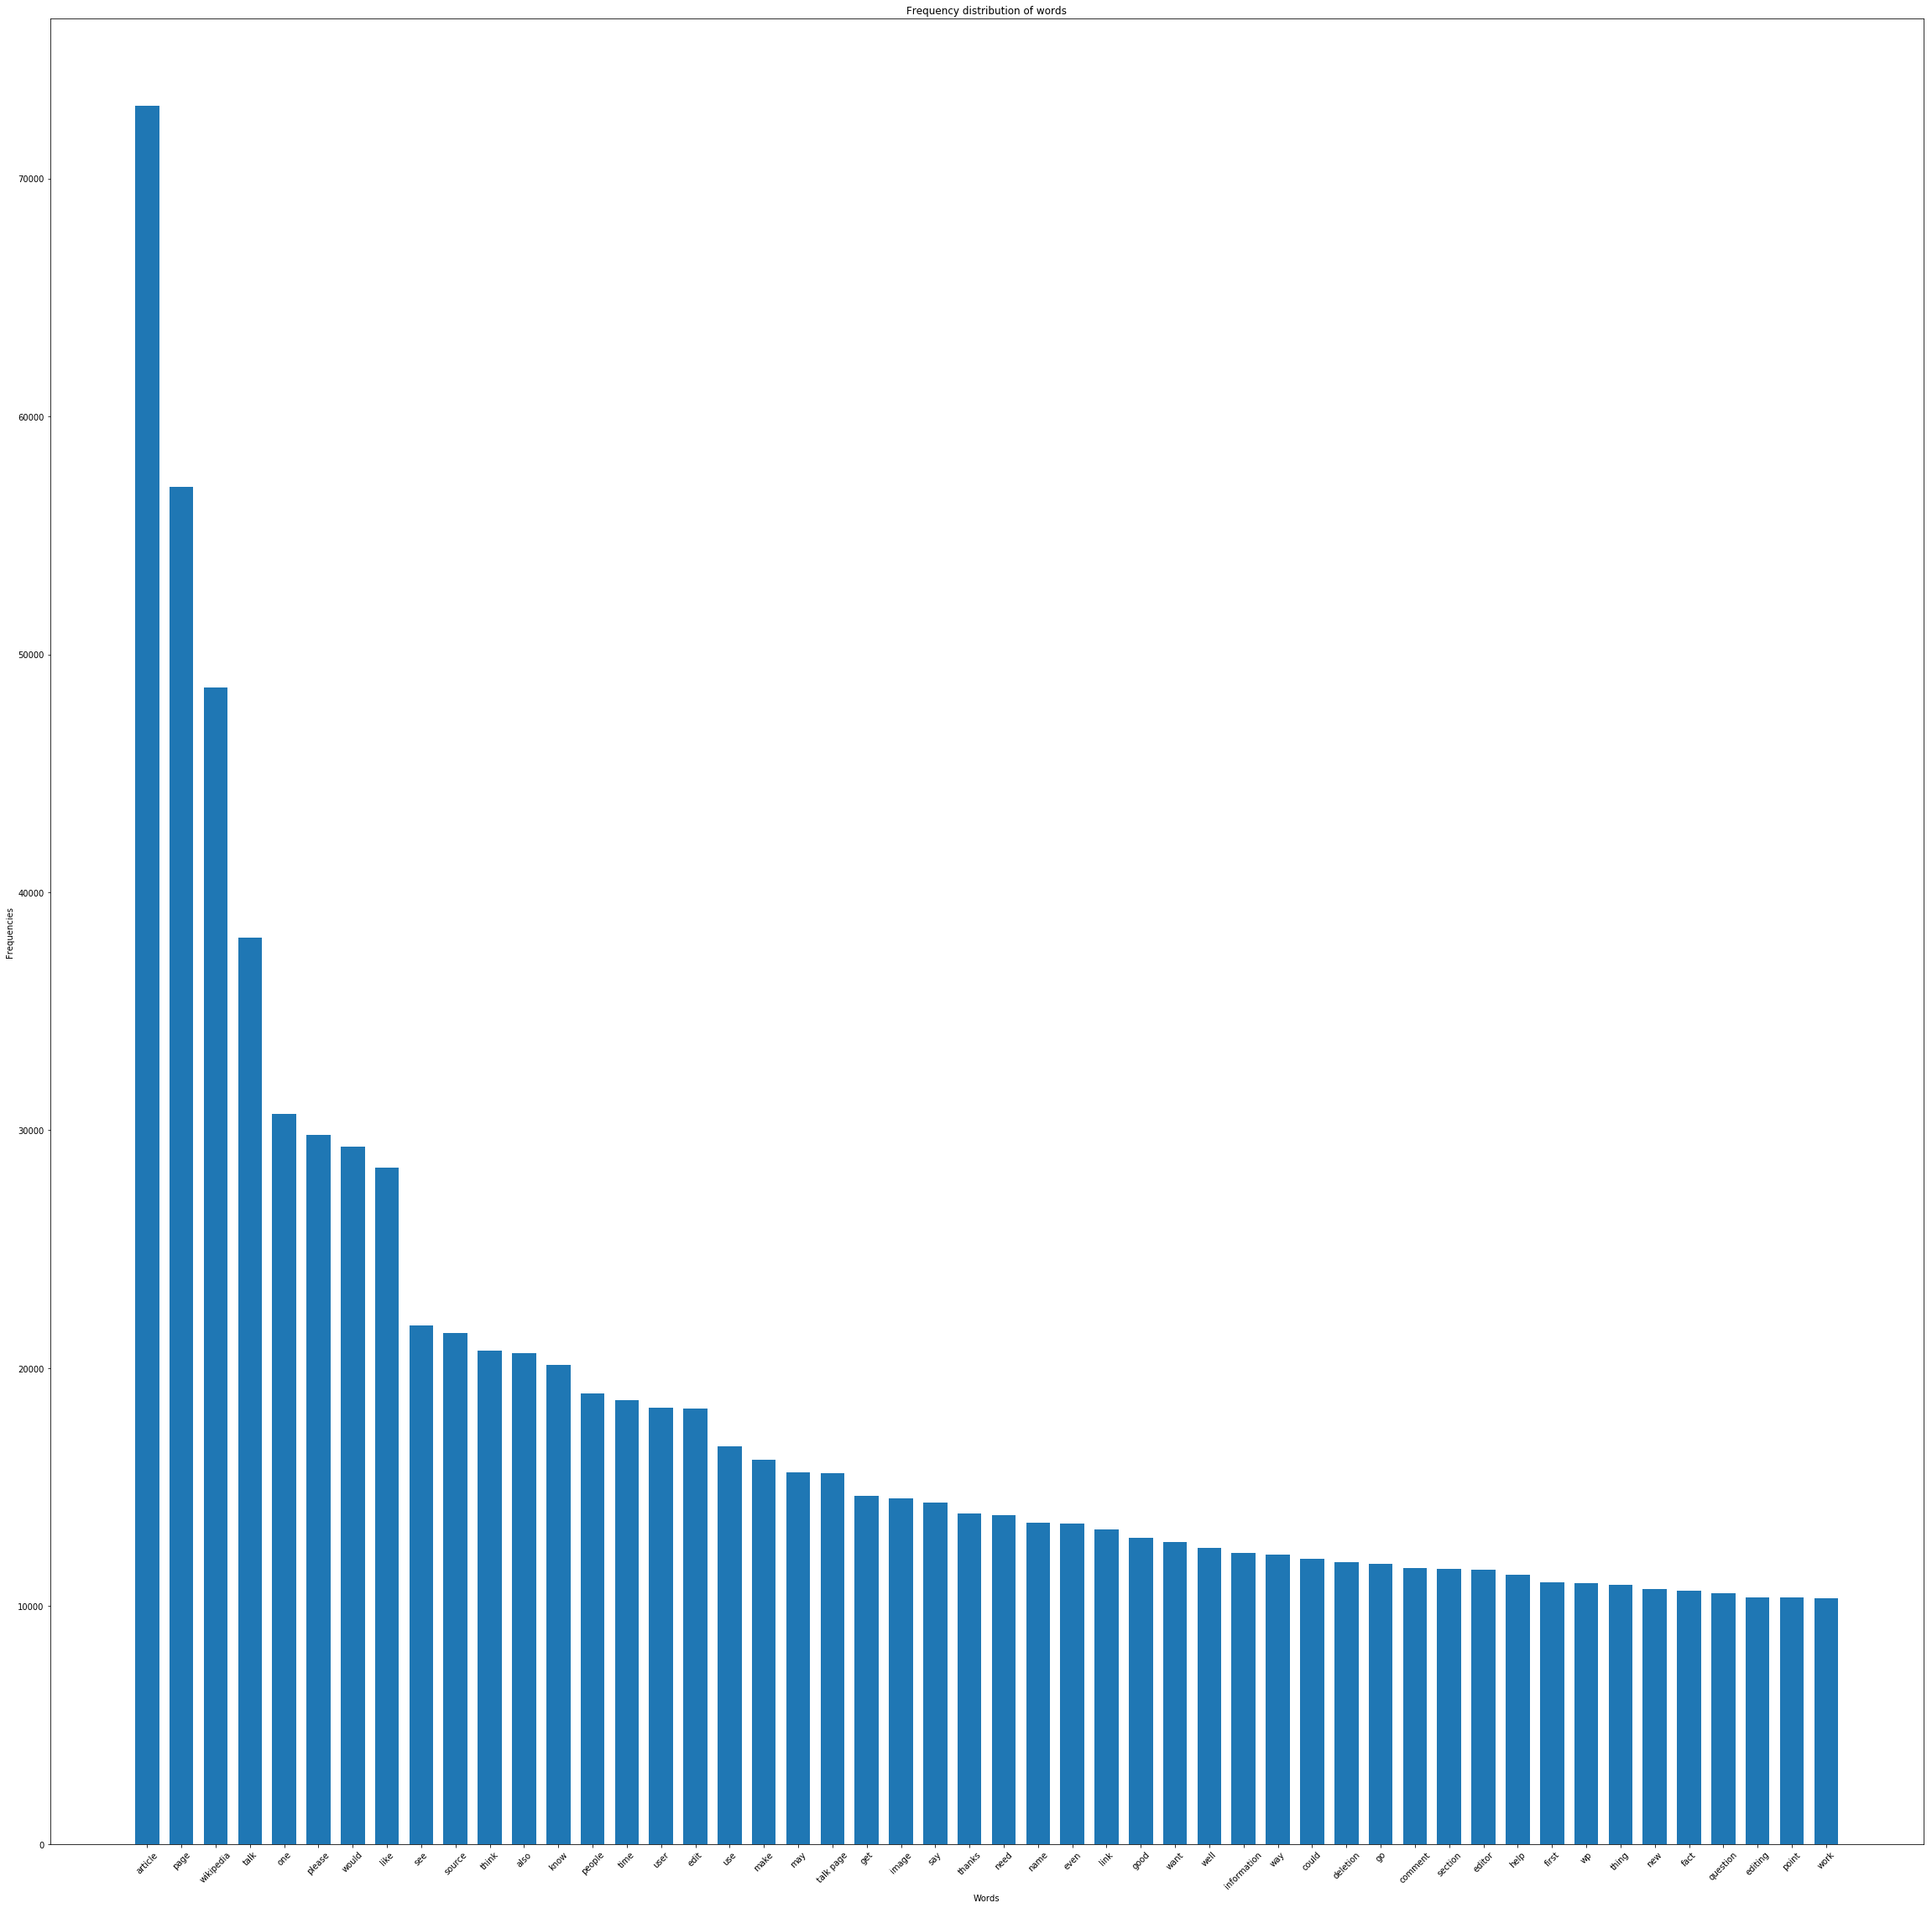

In [10]:
# Plot the Frequency Distribution after preprocessing
plot_freq_dist(itr, "after_preprocess_freq_dist.png")

In [11]:
# Drop NA from the testing data set
test_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
tested_data = preprocess(test_data)

tested_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(len(tested_data))
X_train=trained_data["comment_text"]
y_train=trained_data.iloc[:,2:]
X_test=tested_data["comment_text"]
y_test=tested_data.iloc[:,2:]

63612


In [12]:
print(test_data.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63612, 8)
(159571,)
(63612,)
(159571, 6)
(63612, 6)


In [13]:
# test if the test data and train data have same distributions
def distribution_check(dist_data): 
    print(dist_data['toxic'].value_counts(dropna=False))
    print(dist_data['severe_toxic'].value_counts(dropna=False))
    print(dist_data['obscene'].value_counts(dropna=False))
    print(dist_data['threat'].value_counts(dropna=False))
    print(dist_data['insult'].value_counts(dropna=False))
    print(dist_data['identity_hate'].value_counts(dropna=False))
    
    rows_with_1 = dist_data.apply(lambda x: True if 1 in list(x) else False, axis=1)
    num_rows = len(rows_with_1[rows_with_1 == True].index)
    print("Number of Rows that has atleast 1 in any column: ", num_rows)

In [14]:
# Check the Distrbution of the data across Training and Testing data set

print("Training data")
distribution_check(y_train)
print("\n\nTesting data")
distribution_check(y_test)

Training data
0    144277
1     15294
Name: toxic, dtype: int64
0    157976
1      1595
Name: severe_toxic, dtype: int64
0    151122
1      8449
Name: obscene, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: insult, dtype: int64
0    158166
1      1405
Name: identity_hate, dtype: int64
Number of Rows that has atleast 1 in any column:  16225


Testing data
0    57522
1     6090
Name: toxic, dtype: int64
0    63245
1      367
Name: severe_toxic, dtype: int64
0    59921
1     3691
Name: obscene, dtype: int64
0    63401
1      211
Name: threat, dtype: int64
0    60185
1     3427
Name: insult, dtype: int64
0    62900
1      712
Name: identity_hate, dtype: int64
Number of Rows that has atleast 1 in any column:  6243
